<a href="https://colab.research.google.com/github/BangkitCapstone-HELPER/ML-path/blob/main/extract_string_label.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# importing required modules
from zipfile import ZipFile

# specifying the zip file name
filename = "/content/drive/MyDrive/Capstone/ML/Model/ver2/saved_model (2).zip"

# opening the zip file in READ mode
with ZipFile(filename, 'r') as zip:
	# printing all the contents of the zip file
	zip.printdir()

	# extracting all the files
	print('Extracting all the files now...')
	zip.extractall()
	print('Done!')

File Name                                             Modified             Size
content/inference_graph/saved_model/           2022-05-27 13:00:28            0
content/inference_graph/saved_model/assets/    2022-05-27 12:55:32            0
content/inference_graph/saved_model/saved_model.pb 2022-05-27 13:00:28     18613264
content/inference_graph/saved_model/variables/ 2022-05-27 13:00:28            0
content/inference_graph/saved_model/variables/variables.index 2022-05-27 13:00:28        39312
content/inference_graph/saved_model/variables/variables.data-00000-of-00001 2022-05-27 13:00:28     22767009
Extracting all the files now...
Done!


In [ ]:
!git clone https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 73195, done.
remote: Counting objects: 100% (98/98), done.
remote: Compressing objects: 100% (73/73), done.
remote: Total 73195 (delta 53), reused 44 (delta 22), pack-reused 73097
Receiving objects: 100% (73195/73195), 579.33 MiB | 32.43 MiB/s, done.
Resolving deltas: 100% (51832/51832), done.


In [ ]:
%cd /content/models/research/
!protoc object_detection/protos/*.proto --python_out=.
# Install TensorFlow Object Detection API.
!cp object_detection/packages/tf2/setup.py .
!python -m pip install .

/content/models/research
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/models/research
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
     |████████████████████████████████| 10.3 MB 8.4 MB/s 
     |████████████████████████████████| 352 kB 44.2 MB/s 
     |████████████████████████████████| 2.1 MB 33.3 MB/s 
     |████████████████████████████████| 25.9 MB 1.3 MB/s 
     |████████████████████████████████| 67 kB 5.2 MB/s 
     |████████████████████████████████| 47.8 MB 71 kB/s 
     |████████████████████████████████| 636 kB 54.3 MB/s 
     |████████████████████████████████| 5

In [ ]:
!wget https://raw.githubusercontent.com/hugozanini/object-detection/master/inferenceutils.py
from inferenceutils import *

--2022-05-28 07:47:42--  https://raw.githubusercontent.com/hugozanini/object-detection/master/inferenceutils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2219 (2.2K) [text/plain]
Saving to: ‘inferenceutils.py’

inferenceutils.py   100%[===================>]   2.17K  --.-KB/s    in 0s      

2022-05-28 07:47:42 (33.5 MB/s) - ‘inferenceutils.py’ saved [2219/2219]



In [ ]:
output_dir = 'inference_graph'
labelmap_path = "/content/drive/MyDrive/Capstone/ML/Model/labelmap.pbtxt"

category_index = label_map_util.create_category_index_from_labelmap(labelmap_path, use_display_name=True)
tf.keras.backend.clear_session()
model = tf.saved_model.load(f'/content/content/{output_dir}/saved_model')

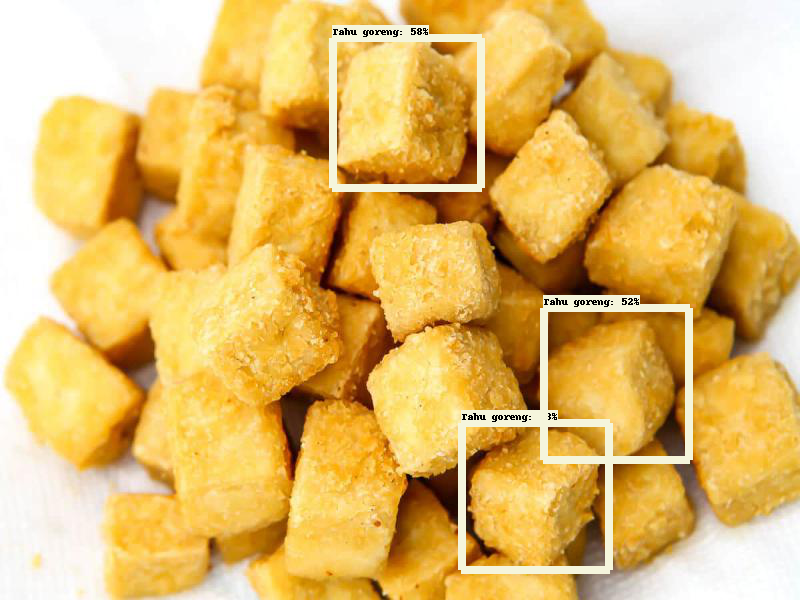

In [ ]:
image_name = '/content/drive/MyDrive/Capstone/ML/Img/test/tahu-148--2-_jpg.rf.edaa079d3fcf76646b4eb76cf737facc.jpg'
  
image_np = load_image_into_numpy_array(image_name)
output_dict = run_inference_for_single_image(model, image_np)
vis_util.visualize_boxes_and_labels_on_image_array(
    image_np,
    output_dict['detection_boxes'],
    output_dict['detection_classes'],
    output_dict['detection_scores'],
    category_index,
    instance_masks=output_dict.get('detection_masks_reframed', None),
    use_normalized_coordinates=True,
    line_thickness=8)
display(Image.fromarray(image_np))

In [ ]:
threshold = 0.5
food_predict = []
for i in range(len(output_dict['detection_scores'])):
  if output_dict['detection_scores'][i] > threshold:
    label = output_dict['detection_classes'][i]
    name = category_index[label]
    if name not in food_predict:
      food_predict.append(name)
print(food_predict)

[{'id': 5, 'name': 'Tahu goreng'}]
